# **RFM Segment Project**

In [3]:
pip install squarify

***Import libraries***

In [4]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import datetime as dt
import time, warnings
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

***Import data from Google Drive***

In [6]:
# Load data into Colab
from google.colab import drive
drive.mount('/content/drive')

# Define the path to the project folder
path = '/content/drive/MyDrive/RFM_Segment/'

# Load data from Excel file
cus_retail = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='ecommerce retail')
seg = pd.read_excel(path + 'ecommerce retail.xlsx', sheet_name='Segmentation')

# Convert the files to CSV format
cus_retail.to_csv(path + 'ecommerce.csv', index=False)
seg.to_csv(path + 'segmentation.csv', index=False)

Mounted at /content/drive


# **Part 1. EDA**

***1. Data***

In [7]:
#Print head
cus_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
1,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland


In [8]:
pip install pandas-profiling[notebook]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=229cb0abaebd38a94bee2b94a9d4eaba157e2eb1cf89b1b2a71e7a7ee811e040
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3

***Generate data profiling report***

In [9]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

# Create report
profile = ProfileReport(cus_retail, title="Profiling Report", explorative=True)

# Show report in notebook
profile.to_notebook_iframe()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: multimethod
    Found existing installation: multimethod 2.0
    Uninstalling multimethod-2.0:
      Successfully uninstalled multimethod-2.0
  Attempting uninstall: imagehash
    Found existing installation: ImageHash 4.3.2
    Uninstalling ImageHash-4.3.2:
      Successfully uninstalled ImageHash-4.3.2
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:07<00:00,  1.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

***2. Checking data type***

In [10]:
#Checking the information of df
cus_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
#Check Data Summary
cus_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386560,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


***3. Checking missing value*** **văn bản in đậm**

In [12]:
#Counting number of missing value in each column
Cus_retail_na = cus_retail.isna().sum()
print(Cus_retail_na)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Notes:
+ The data contains negative values in the Quantity and Unit Price fields.
+ Description have missing value, but it is not affect analysis process, so can not edit this column.
+ CustomerID have missing values --> Delete row is null.
+ Datatype of CustomerID is not true, needing convert datatype to int64.

# **Part 2. Clean Data**

***1. Delete missing value***

In [13]:
#Drop missing value
cus_retail.dropna(subset=['CustomerID'], inplace=True)

In [14]:
cus_retail.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


***2. Convert data type of Customer ID***

In [15]:
#Convert datatype CustomerID to int
cus_retail['CustomerID'] = cus_retail['CustomerID'].astype(int)

In [16]:
#Checking after converting
cus_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


***3. Remove quantities less than 0***

In [17]:
#Remove cancel order
cus_retail = cus_retail[cus_retail['Quantity']>0]
cus_retail.shape

(397924, 8)

# **Part 3. Segment Analyst**

In [18]:
#Datetime now
present = dt.date(2011,12,31)
print(present)

2011-12-31


In [19]:
cus_retail['Totalrevenue'] = cus_retail['Quantity'] * cus_retail['UnitPrice']
cus_retail['InvoiceDate'] = pd.to_datetime(cus_retail['InvoiceDate'])
cus_retail['Date'] = cus_retail['InvoiceDate'].dt.date
RFM_df = cus_retail.groupby('CustomerID').agg({'Date':'max','InvoiceNo':'count','Totalrevenue':'sum'}).reset_index()
RFM_df.columns = ['CustomerID','LastPurchase','F_value','M_value']
RFM_df['R_value'] = RFM_df['LastPurchase'].apply(lambda x: (present - x).days)
RFM_df = RFM_df.drop('LastPurchase', axis=1)
RFM_df.columns = ['CustomerID','F_value','M_value','R_value']
RFM_df

<ipython-input-19-402ad053753d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_retail['Totalrevenue'] = cus_retail['Quantity'] * cus_retail['UnitPrice']
<ipython-input-19-402ad053753d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cus_retail['InvoiceDate'] = pd.to_datetime(cus_retail['InvoiceDate'])
<ipython-input-19-402ad053753d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,CustomerID,F_value,M_value,R_value
0,12346,1,77183.60,347
1,12347,182,4310.00,24
2,12348,31,1797.24,97
3,12349,73,1757.55,40
4,12350,17,334.40,332
...,...,...,...,...
4334,18280,10,180.60,299
4335,18281,7,80.82,202
4336,18282,12,178.05,29
4337,18283,756,2094.88,25


In [20]:
#R score
RFM_df['R_score'] = pd.qcut(x = RFM_df['R_value'], q = 5, labels = [5, 4, 3, 2, 1])
# F score
RFM_df['F_score'], bins = pd.qcut(RFM_df['F_value'].rank(method='first'),
                                  q = 5,
                                  labels= [1, 2, 3, 4, 5],
                                  retbins = True,
                                  precision=5,
                                  duplicates='drop')
#M score
RFM_df['M_score'] = pd.qcut(x = RFM_df['M_value'], q = 5, labels = [1, 2, 3, 4, 5])
#RFM score
RFM_df['RFM_score'] = (RFM_df['R_score'].astype(str) + RFM_df['F_score'].astype(str) + RFM_df['M_score'].astype(str))
RFM_df

,CustomerID,F_value,M_value,R_value,R_score,F_score,M_score,RFM_score
0,12346,1,77183.60,347,1,1,5,115
1,12347,182,4310.00,24,5,5,5,555
2,12348,31,1797.24,97,2,3,4,234
3,12349,73,1757.55,40,4,4,4,444
4,12350,17,334.40,332,1,2,2,122
...,...,...,...,...,...,...,...,...
4334,18280,10,180.60,299,1,1,1,111
4335,18281,7,80.82,202,1,1,1,111
4336,18282,12,178.05,29,5,1,1,511
4337,18283,756,2094.88,25,5,5,5,555


In [21]:
#Transform Segmentation table segment
seg['RFM_score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM_score').reset_index(drop=True)
seg.column = ['Segment', 'RFM_score']
print(seg)

            Segment                    RFM Score RFM_score
0         Champions  555,554,544,545,454,455,445       555
1         Champions  555,554,544,545,454,455,445       554
2         Champions  555,554,544,545,454,455,445       544
3         Champions  555,554,544,545,454,455,445       545
4         Champions  555,554,544,545,454,455,445       454
..              ...                          ...       ...
120  Lost customers      111,112,121,131,141,151       112
121  Lost customers      111,112,121,131,141,151       121
122  Lost customers      111,112,121,131,141,151       131
123  Lost customers      111,112,121,131,141,151       141
124  Lost customers      111,112,121,131,141,151       151

[125 rows x 3 columns]


<ipython-input-21-f9380d91a9a1>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  seg.column = ['Segment', 'RFM_score']


In [22]:
#Merging RFM with segment
RFM = RFM_df.merge(seg, how = 'left', on = 'RFM_score')
RFM

,CustomerID,F_value,M_value,R_value,R_score,F_score,M_score,RFM_score,Segment,RFM Score
0,12346,1,77183.60,347,1,1,5,115,Cannot Lose Them,"155,154,144,214,215,115,114,113"
1,12347,182,4310.00,24,5,5,5,555,Champions,"555,554,544,545,454,455,445"
2,12348,31,1797.24,97,2,3,4,234,At Risk,"255,254,245,244,253,252,243,242,235,234,225,22..."
3,12349,73,1757.55,40,4,4,4,444,Loyal,"543,444,435,355,354,345,344,335"
4,12350,17,334.40,332,1,2,2,122,Hibernating customers,"332,322,233,232,223,222,132,123,122,212,211"
...,...,...,...,...,...,...,...,...,...,...
4334,18280,10,180.60,299,1,1,1,111,Lost customers,"111,112,121,131,141,151"
4335,18281,7,80.82,202,1,1,1,111,Lost customers,"111,112,121,131,141,151"
4336,18282,12,178.05,29,5,1,1,511,New Customers,"512,511,422,421,412,411,311"
4337,18283,756,2094.88,25,5,5,5,555,Champions,"555,554,544,545,454,455,445"


# **Part 4. Visualization**

**4.1. Retention Customer**

In [23]:
#function for month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
#apply the function
data = cus_retail
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data.tail()
#create a column index with the minimum invoice date
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
#Create a date element function to get a series
def get_date_elements(df, column):
  day = df[column].dt.day
  month = df[column].dt.month
  year = df[column].dt.year
  return day, month, year
#get date element for our cohort and invoice columns
_, Invoice_Month, Invoice_Year = get_date_elements(data, 'InvoiceMonth')
_, Cohort_Month, Cohort_Year = get_date_elements(data, 'CohortMonth')
#Create an index cohort
year_diff = Invoice_Year - Cohort_Year
month_diff = Invoice_Month - Cohort_Month
data['CohortIndex'] = year_diff*12 + month_diff + 1
data.head()

<ipython-input-23-77f581046428>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
<ipython-input-23-77f581046428>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
<ipython-input-23-77f581046428>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalrevenue,Date,InvoiceMonth,CohortMonth,CohortIndex
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,2011-01-18,2011-01-01,2011-01-01,1
2,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,25.2,2010-12-07,2010-12-01,2010-12-01,1
3,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,17.0,2010-12-07,2010-12-01,2010-12-01,1
4,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347,Iceland,39.0,2010-12-07,2010-12-01,2010-12-01,1
5,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347,Iceland,23.4,2010-12-07,2010-12-01,2010-12-01,1


In [24]:
#Create pivot table
Cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
Cohort_table = Cohort_data.pivot(index = 'CohortMonth', columns = ['CohortIndex'], values = 'CustomerID')

In [25]:
#Change index
Cohort_table.index = Cohort_table.index.strftime('%B %Y')

In [26]:
#Create a percentage
Cohort_table_ = Cohort_table.divide(Cohort_table.iloc[:,0], axis = 0)

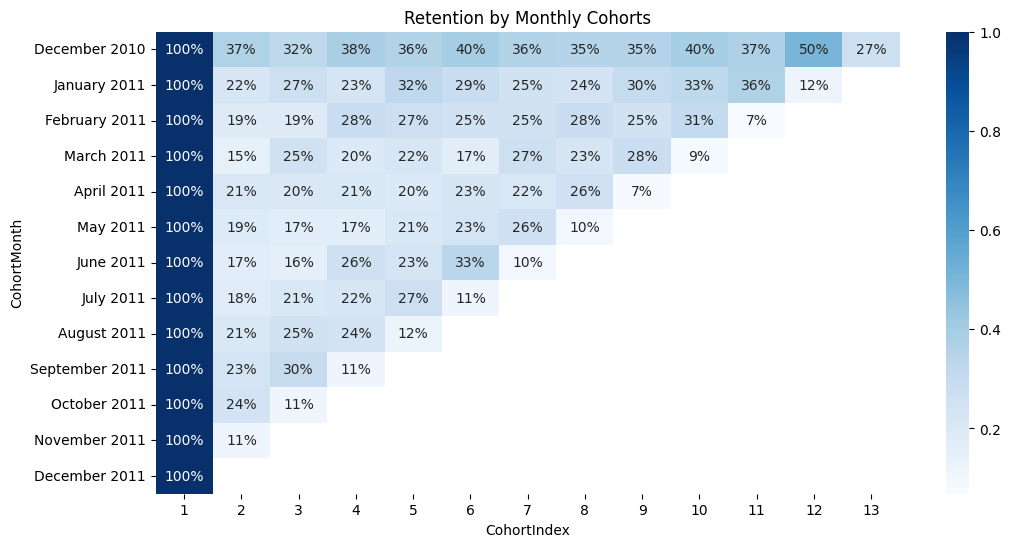

In [27]:
#Visualization
plt.figure(figsize=(12, 6))  # Set the figure size before the heatmap
sns.heatmap(Cohort_table_, annot=True, cmap='Blues', fmt='.0%')
plt.title('Retention by Monthly Cohorts')
plt.show()

**4.2. Distribution by Recency, Frequency and Monetary**

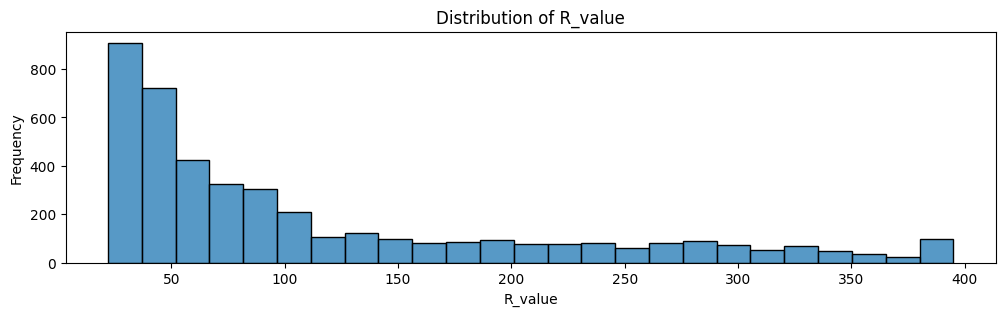

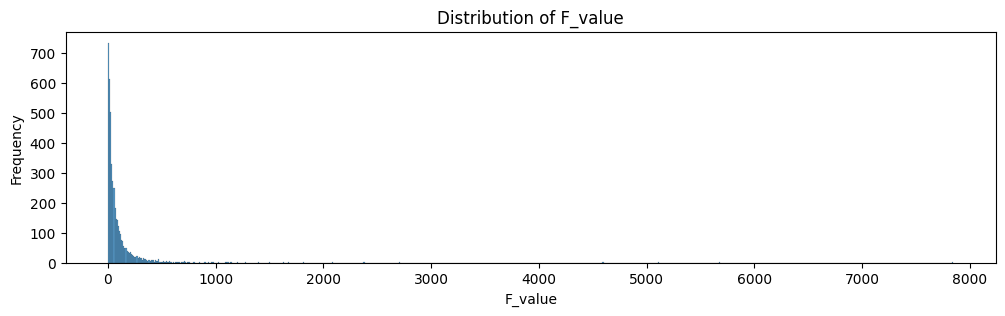

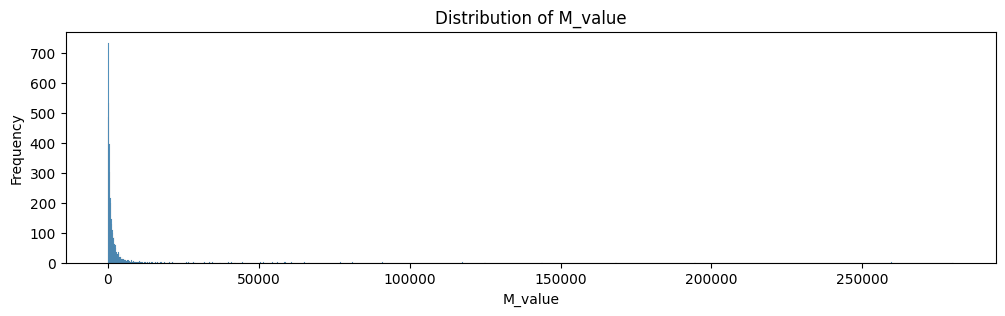

In [28]:
#Histogram
joined = pd.DataFrame(RFM)
colnames = ['R_value', 'F_value', 'M_value']

for col in colnames:
    plt.figure(figsize=(12, 3))
    sns.histplot(joined[col], kde=False)
    plt.title('Distribution of %s' % col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**4.3. Contribution by Segment**

In [29]:
# Define colors for each segment
colors = ["gold", "silver", "orange", "green", "blue", "red", "pink", "brown", "gray", "cornsilk", "black"
]

In [30]:
#Creating dataframe including segment and number of customer each segment
Cus_seg = RFM.groupby('Segment')['CustomerID'].count().reset_index()
Cus_seg = Cus_seg.sort_values(by='CustomerID', ascending = False)
Cus_seg.columns = ['Segment','No_customer']
print(Cus_seg)

                  Segment  No_customer
4   Hibernating customers          808
3               Champions          799
9      Potential Loyalist          512
1                 At Risk          433
5          Lost customers          424
6                   Loyal          418
8           New Customers          304
7          Need Attention          229
0          About To Sleep          191
10              Promising          134
2        Cannot Lose Them           87


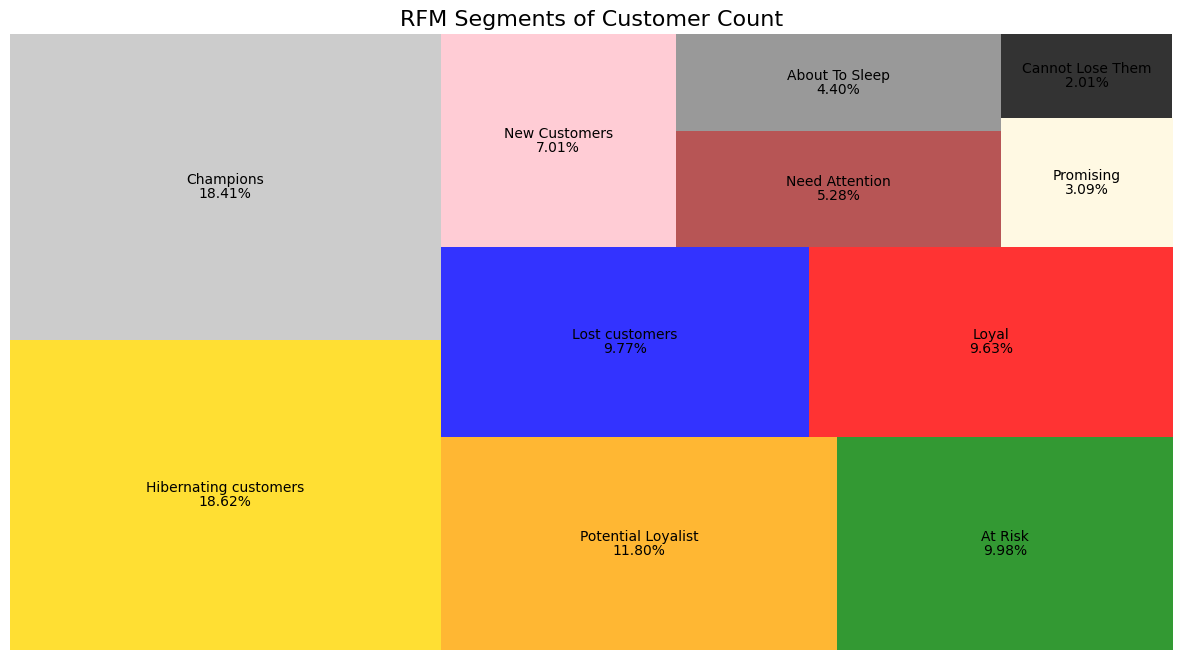

In [31]:
#Treemap
fig, ax = plt.subplots(1, figsize = (15, 8))
squarify.plot(sizes=Cus_seg["No_customer"],
              label=Cus_seg["Segment"],
              value=[f'{x / Cus_seg["No_customer"].sum() * 100:.2f}%' for x in Cus_seg["No_customer"]],
              alpha=.8,
              color=colors)
plt.title('RFM Segments of Customer Count', fontsize = 16)
plt.axis('off')
plt.show()

**4.4. Segment by Spending**

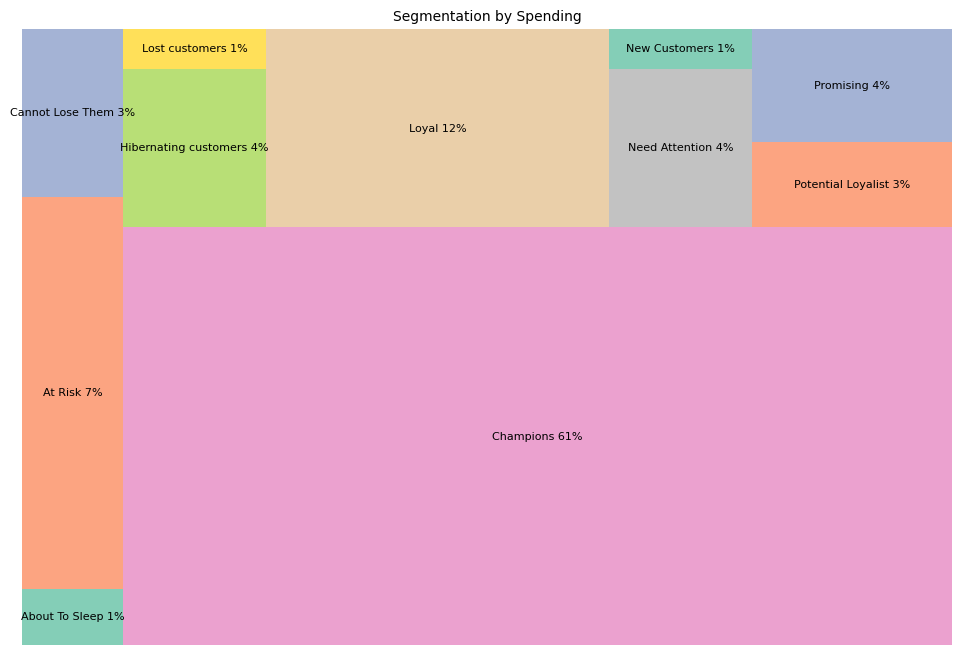

In [32]:
# Calculating spending (M_value) each segment
segment_by_spending = (
    RFM[RFM['M_value'] > 0][['Segment', 'M_value']]
    .groupby('Segment')['M_value']
    .sum()
    .reset_index()
    .rename(columns={'M_value': 'Spending'})
)

# Calculate percentage value to segment labels
segment_by_spending['percent_segment_by_spending'] = round(
    segment_by_spending['Spending'] / segment_by_spending['Spending'].sum() * 100
)

# Convert the percentage values to integer type for better readability
segment_by_spending['percent_segment_by_spending'] = segment_by_spending['percent_segment_by_spending'].astype(int)

# Append percentage values to segment labels
segment_by_spending['Segment'] = (
    segment_by_spending['Segment'] + ' ' +
    segment_by_spending['percent_segment_by_spending'].astype(str) + '%'
)

# Remove segments with 0% contribution.
segment_by_spending = segment_by_spending[segment_by_spending['percent_segment_by_spending'] > 0]

# Plot a treemap to visualize spending distribution by segment
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_by_spending['percent_segment_by_spending'],
    label=segment_by_spending['Segment'],
    color=sns.color_palette("Set2"),
    alpha=0.8,
    text_kwargs={'fontsize': 8}
)
plt.title("Segmentation by Spending", fontsize=10)
plt.axis('off')
plt.show()

**4.5. Segmentation by Frequency**

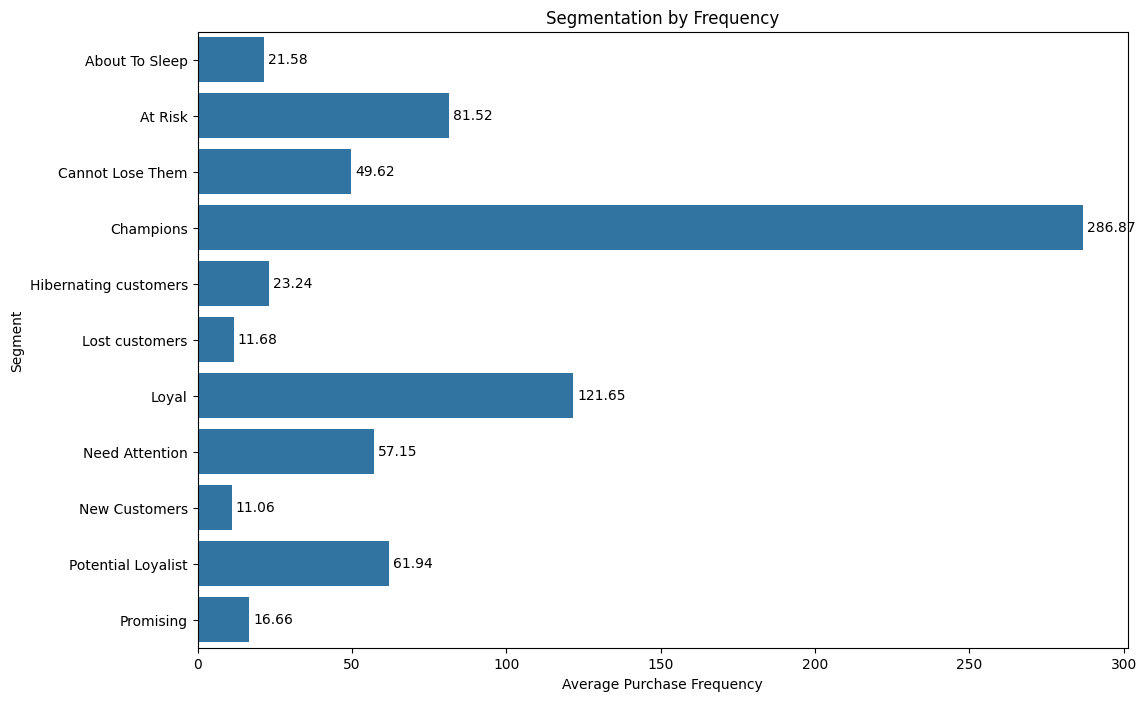

In [33]:
# Calculate the average frequency of purchases for each segment
segment_by_frequency = RFM[RFM.F_value > 0][['Segment', 'F_value']].groupby('Segment')['F_value'].mean().reset_index()

# Plot a bar chart to visualize the average frequency per segment
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=segment_by_frequency, x='F_value', y='Segment')

# Add value labels to the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', padding=3)

# Customize the plot
plt.xlabel('Average Purchase Frequency')
plt.ylabel('Segment')
plt.title('Segmentation by Frequency')
plt.show()

**4.6. Segmentation by Recency**

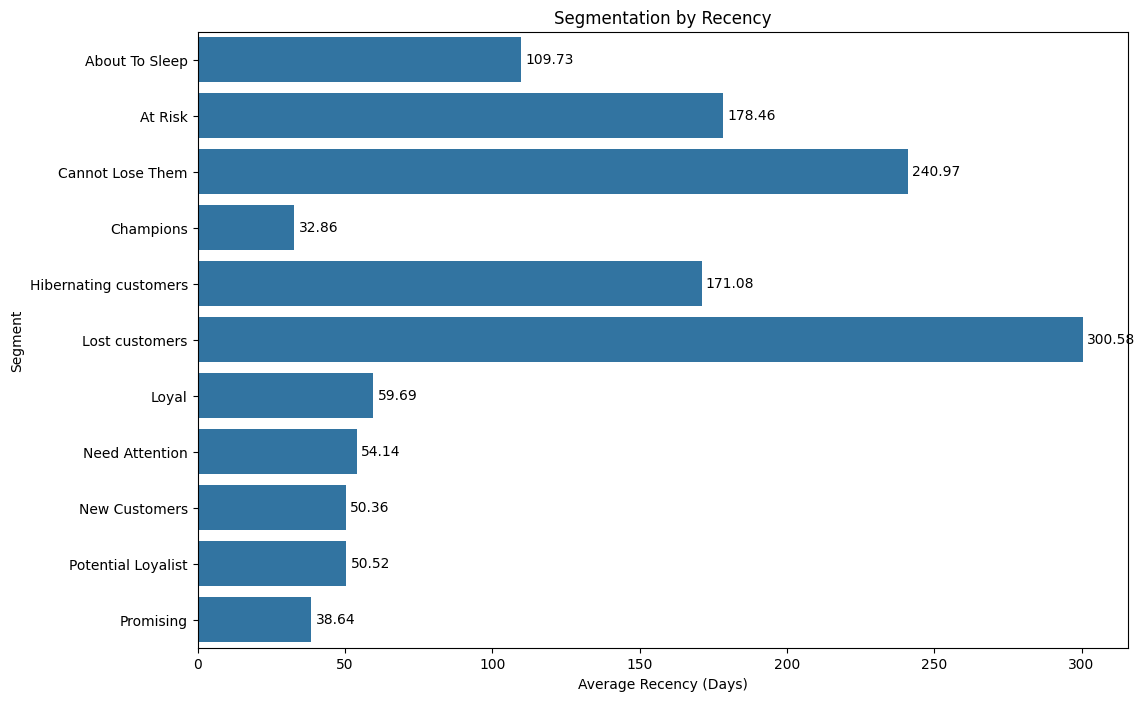

In [34]:
# Calculate the average recency (days since last purchase) for each segment
segment_by_recency = RFM[RFM.R_value > 0][['Segment', 'R_value']].groupby('Segment')['R_value'].mean().reset_index()

# Plot a bar chart to visualize the average frequency per segment
segment_by_recency = segment_by_recency.rename(columns={'R_value': 'Recency'})

# Add value labels to the bars
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=segment_by_recency, x='Recency', y='Segment')

# Plot a bar chart to visualize the average recency per segment
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.xlabel('Average Recency (Days)')
plt.ylabel('Segment')
plt.title('Segmentation by Recency')
plt.show()

**4.7. Top 5 segment by revenue**

<ipython-input-35-3ded049511c9>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_revenue', y='Segment', data=top5_revenue, palette=Color_5)


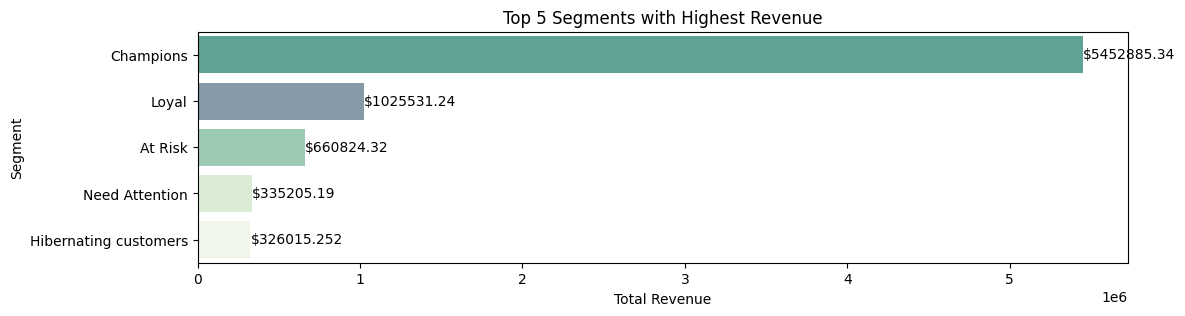

In [35]:
# Group by 'Segment' and sum the 'M_value'
seg_revenue = RFM.groupby('Segment')['M_value'].sum().reset_index()

# Rename the columns for clarity
seg_revenue.columns = ['Segment', 'Total_revenue']

# Sort the dataframe by 'Total_revenue' in descending order
seg_revenue = seg_revenue.sort_values(by='Total_revenue', ascending=False)

# Select the top 5 segments with the highest revenue
top5_revenue = seg_revenue.head(5)

# Define colors for the top 5 segments
Color_5 = ['#55AD9B', '#809BAD', '#95D2B3', '#D8EFD3', '#F1F8E8']

# Visualize with a barplot
plt.figure(figsize=(12, 3))
sns.barplot(x='Total_revenue', y='Segment', data=top5_revenue, palette=Color_5)

# Add value labels to the bars
for index, value in enumerate(top5_revenue['Total_revenue']):
    plt.text(value, index, f'${value}', va='center', fontsize=10)

# Customize the plot
plt.xlabel("Total Revenue")
plt.ylabel("Segment")
plt.title("Top 5 Segments with Highest Revenue")

# Show the plot
plt.show()

**4.7. Top 5 segment by transactions**

<ipython-input-36-058353b0ceda>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Segment', data=top5_frequency, palette=Color_5)


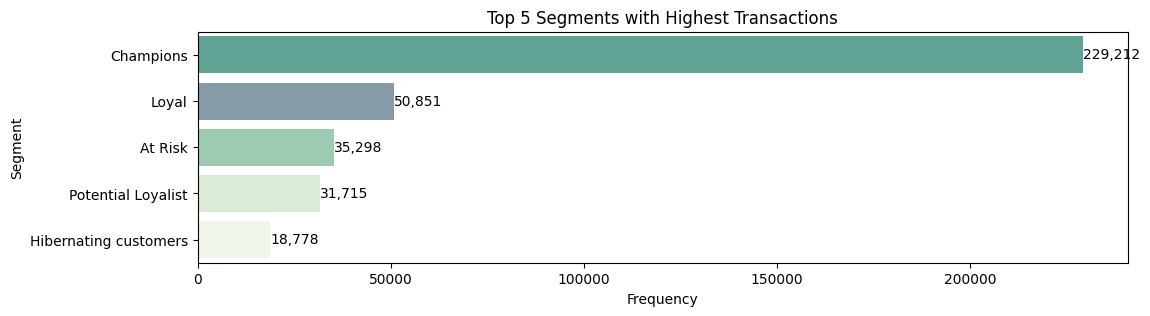

In [36]:
# Group by 'Segment' and sum the 'F_value'
seg_frequency = RFM.groupby('Segment')['F_value'].sum().reset_index()

# Rename the columns for clarity
seg_frequency.columns = ['Segment', 'Frequency']

# Sort the dataframe by 'Frequency' in descending order
seg_frequency = seg_frequency.sort_values(by='Frequency', ascending=False)

# Select the top 5 segments with the highest frequency
top5_frequency = seg_frequency.head(5)

# Define colors for the top 5 segments
Color_5 = ['#55AD9B', '#809BAD', '#95D2B3', '#D8EFD3', '#F1F8E8']

# Visualize with a barplot
plt.figure(figsize=(12, 3))
sns.barplot(x='Frequency', y='Segment', data=top5_frequency, palette=Color_5)

# Add value labels to the bars
for index, value in enumerate(top5_frequency['Frequency']):
    plt.text(value, index, f'{value:,.0f}', color='black', va="center", fontsize=10)

# Customize the plot
plt.xlabel("Frequency")
plt.ylabel("Segment")
plt.title("Top 5 Segments with Highest Transactions")

# Show the plot
plt.show()